In [54]:
""" Task 1: Data Cleaning & Preprocessing (Titanic Dataset)
Step 1: Import the Dataset and Explore Basic Info """
# Step 1: Importing Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Titanic dataset (ensure 'titanic.csv' is in the same folder)
df = pd.read_csv('Titanic-Dataset.csv')


df_initial = df.copy()  # copy of original dataset
df_copy2 = df.copy()  # copy of original dataset


# Basic Exploration
print("\n--- Dataset Head ---")
print(df.head())

print("\n\n--- Dataset Info ---")
print(df.info())

print("\n\n--- Null Values in Dataset ---")
print(df.isnull().sum())



--- Dataset Head ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [55]:
""" Step 2: Handle Missing Values using Mean/Median/Imputation """

# Checking columns with null values
print("\n--- Missing Values Before Handling ---")
print(df.isnull().sum())

# Display Mean Values
age_mean = df['Age'].mean()
fare_mean = df['Fare'].mean()

print(f"\n\n--- Mean of Age: {age_mean:.2f} ---")
print(f"--- Mean of Fare: {fare_mean:.2f} ---")

# Fill 'Age' missing values with the median
# unsupported method syntax for a dataframe  = df['Age'].fillna(df['Age'].median(), inplace=True)
df.fillna({'Age': df['Age'].median()}, inplace=True)


# Fill 'Embarked' missing values with mode (most frequent)
# unsupported method syntax for a dataframe  = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)


# Drop 'Cabin' due to too many missing values
df.drop('Cabin', axis=1, inplace=True)  # ---- column 'Cabin' dropped here -----

print("\n\n--- Missing Values After Handling ---")
print(df.isnull().sum())



--- Missing Values Before Handling ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


--- Mean of Age: 29.70 ---
--- Mean of Fare: 32.20 ---


--- Missing Values After Handling ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [56]:
""" Step 3: Convert Categorical Features into Numerical using Encoding """

# Label Encoding for 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\n--- Dataset After Encoding ---\n")
print(df.head())


--- Dataset After Encoding ---

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False   

In [57]:
""" Step 4: Normalize/Standardize Numerical Features """

from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_features = ['Age', 'Fare']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\n--- Dataset After Normalization/Standardization ---\n")
print(df.head())


--- Dataset After Normalization/Standardization ---

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0


---- Visualize Outliers using BOXPLOTS ----



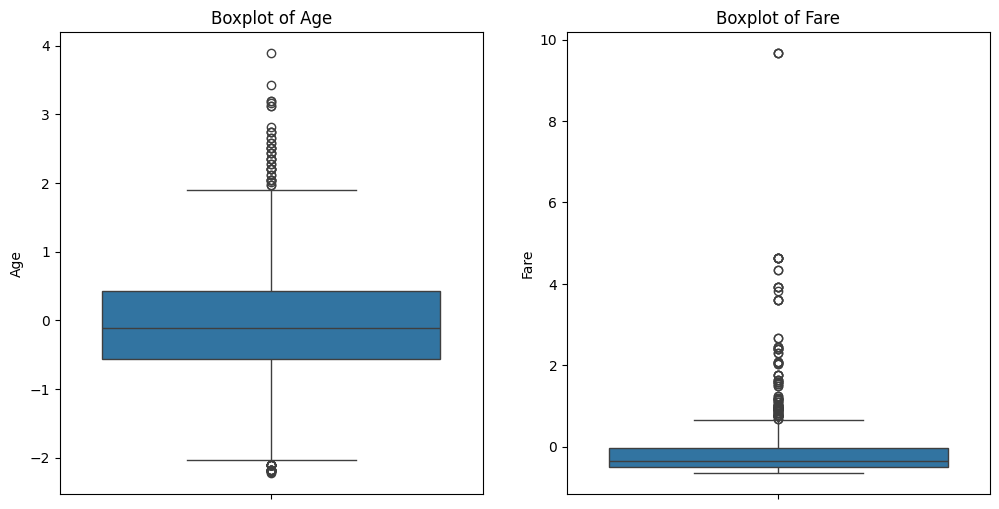



--- Dataset Shape => 'AFTER OUTLIER REMOVAL' ---

(775, 12)


In [58]:
""" Step 5: Visualize Outliers using Boxplots and Remove Them """

# Visualizing Outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
print("\n---- Visualize Outliers using BOXPLOTS ----\n")
plt.show()

# Outlier Removal using IQR method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare'
df = remove_outliers('Fare')

print("\n\n--- Dataset Shape => 'AFTER OUTLIER REMOVAL' ---\n")
print(df.shape)


In [59]:
# Skills to learn: Data cleaning, handling nulls, encoding, feature scaling.

# 1. Data cleaning
# Display initial dataset shape and nulls
print("\n--- Initial Dataset Shape ---")
print(df_copy2.shape)

print("\n\n--- Null Values in Dataset Before Cleaning ---")
print(df_copy2.isnull().sum())

# Drop 'Cabin' column due to excessive missing values
df_cleaned = df_copy2.drop('Cabin', axis=1)

print("\n\n--- Dataset Columns After Dropping 'Cabin' ---")
print(df_cleaned.columns)



--- Initial Dataset Shape ---
(891, 12)


--- Null Values in Dataset Before Cleaning ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


--- Dataset Columns After Dropping 'Cabin' ---
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [60]:
# 2. Handling Missing Values
print("\n--- Null Values Before Handling ---")
print(df_cleaned.isnull().sum())

# Fill 'Age' with median for 'df_cleaned'
# unsupported method syntax for a dataframe  =  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df.fillna({'Age': df_cleaned['Age'].median()}, inplace=True)

# Fill 'Embarked' with mode for 'df_cleaned'
# unsupported method syntax for a dataframe  =  df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)
df.fillna({'Embarked': df_cleaned['Embarked'].mode()[0]}, inplace=True)

print("\n\n--- Null Values After Handling ---")
print(df_cleaned.isnull().sum())


--- Null Values Before Handling ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


--- Null Values After Handling ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [61]:
"""
Encoding (Categorical to Numerical)
Step-wise:

Encode Sex using label encoding.

Encode Embarked using one-hot encoding.
"""
# Label Encoding for 'Sex'
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'Embarked'
df_encoded = pd.get_dummies(df_cleaned, columns=['Embarked'], drop_first=True)

print("\n--- Encoded Dataset Columns ---")
print(df_encoded.columns)

print("\n--- First 5 Rows of Encoded Dataset ---")
print(df_encoded.head())



--- Encoded Dataset Columns ---
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

--- First 5 Rows of Encoded Dataset ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0      

In [62]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df_encoded[['Age', 'Fare']] = scaler.fit_transform(df_encoded[['Age', 'Fare']])

print("\n--- First 5 Rows After Feature Scaling ---")
print(df_encoded[['Age', 'Fare']].head())



--- First 5 Rows After Feature Scaling ---
        Age      Fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337
